In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=10000, centers=3, n_features=3, cluster_std=1.5)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X
df = pd.DataFrame(dict(x=X_scaled[:,0], y=X_scaled[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green', 3 : 'black'}

# fig, ax = plt.subplots()
# grouped = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# plt.show()   

In [8]:
points = df.drop('label', axis=1)
points.head()

,x,y
0,-4.740892,-5.172672
1,-0.271467,-9.122067
2,2.174766,-8.277068
3,1.188197,-8.401416
4,0.218820,-9.383962


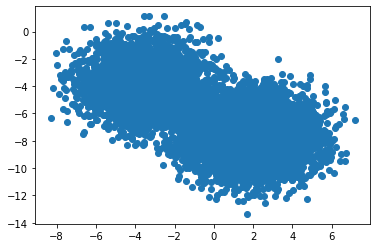

In [9]:
# Scatter plot of our label-less data
plt.scatter(points.x, points.y)
plt.show()

In [10]:
X=points.values

In [9]:
def Kmeans(X,k):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    closest = np.zeros(n).astype(int)

    while True:
        old_closest = closest.copy()
        distances = cdist(X,centers)
        closest = np.argmin(distances, axis=1)
        for i in range(k):
            centers[i, :] = X[closest == i].mean(axis = 0)
        if all(closest == old_closest):
            break

    return closest, centers

In [33]:
labels, centers = Kmeans(X,3)
centers

array([[-9.73395278, -0.23305715],
       [ 4.43231004, -1.61182685],
       [-6.41233126, -9.63416711]])

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)


Centers found by scikit-learn:
[[-9.73395278 -0.23305715]
 [ 4.43231004 -1.61182685]
 [-6.41233126 -9.63416711]]


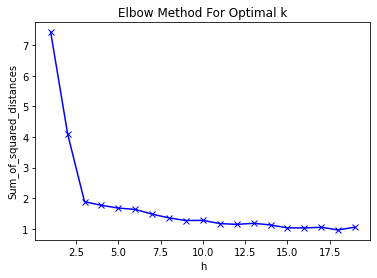

In [31]:
sum_of_squared_distances = []
H = range(1,20)
#print(centers)
for h in H:
    labels, centers = Kmeans(X,h)
    sum_of_squared_distances.append(np.average(np.min(cdist(X, centers), axis=1))) # WCV

# Plot
plt.plot(H, sum_of_squared_distances, 'bx-')
plt.xlabel('h')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show() 

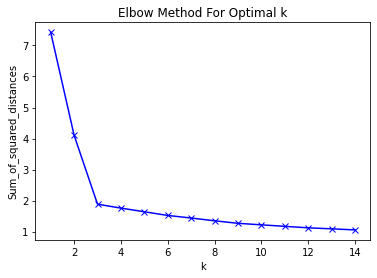

In [37]:

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(np.average(np.min(cdist(points, km.cluster_centers_), axis=1)))
# Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

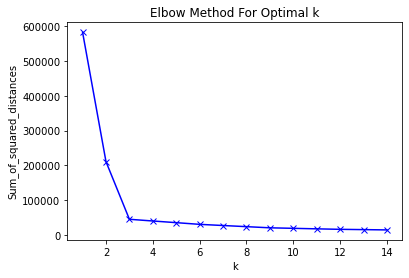

In [36]:
from sklearn.cluster import KMeans 

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_) # WCV 
# Plot
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
C1=(df.loc[df['label']==0].drop('label', axis=1)).values
C2=(df.loc[df['label']==1].drop('label', axis=1)).values
C3=(df.loc[df['label']==2].drop('label', axis=1)).values


In [14]:
import math as m
def kc(x,y):
    d=m.sqrt(m.pow((x[0]-y[0]),2)+ m.pow((x[1]-y[1]),2))
    return d
def single(C_1, C_2):
    list_result = []
    for i in C_1: 
        for j in C_2:
            list_result.append(kc(i,j))
    return min(list_result)

def complete(C_1, C_2):
    
    list_result = []

    for i in C_1: 
        for j in C_2:
            list_result.append(kc(i,j)) 
            
    return max(list_result)

def average(C_1, C_2):
    list_result = []
    result = 0
    for i in C_1: 
        for j in C_2:
            result += kc(i,j)
            list_result.append(result)
    return ((result)/(len(C_1)*len(C_2)))


In [15]:
print("Single = ", single(C1,C2))
print("Complete = ", complete(C1,C2))
print("Average = ", average(C1,C2))

Single =  0.005223007616000673
Complete =  16.71099093971422
Average =  7.0409321983088615


In [19]:
from scipy.spatial.distance import cdist
def cdist_single(C_1, C_2):
    c=[]
    d=cdist(C_2,C_1) 
    for i in range(len(d)): 
        c.append(min(d[i]))
    return min(c)
def cdist_complete(C_1, C_2):
    c=[]
    d=cdist(C_2,C_1) 
    
    for i in range(len(d)): 
        c.append(max(d[i]))
    return max(c)
def cdist_average(C_1, C_2):
    d=cdist(C_2,C_1) 
    s=0
    for i in range(len(d)): 
        s+=sum(d[i])
    return s/(len(C_1)*len(C_2))

In [20]:
print("Cdist_Single = ",cdist_single(C1, C2) )
print("Cdist_Complete = ", cdist_complete(C1, C2))
print("Cdist_Average = ", cdist_average(C1, C2))

Cdist_Single =  0.005223007616000673
Cdist_Complete =  16.71099093971422
Cdist_Average =  7.040932198309365
